#**Questão 1:**

In [2]:
import pandas as pd

In [3]:
emotions_data = pd.read_csv('/content/emotions.csv')
emotions_data.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
emotions_data.columns

Index(['Unnamed: 0', 'text', 'label'], dtype='object')

In [5]:
import pandas as pd
import re

# Função para limpar o texto, removendo caracteres especiais
def limpar_texto(texto):
    # Regex para identificar os caracteres a serem removidos
    texto_limpo = re.sub(r'[^\w\s]', '', texto)
    return texto_limpo

# Aplicando a função de limpeza na coluna de texto do DataFrame
emotions_data['text'] = emotions_data['text'].apply(limpar_texto)

# Exibe o DataFrame limpo
print(emotions_data)


        Unnamed: 0                                               text  label
0                0      i just feel really helpless and heavy hearted      4
1                1  ive enjoyed being able to slouch about relax a...      0
2                2  i gave up my internship with the dmrg and am f...      4
3                3                         i dont know i feel so lost      0
4                4  i am a kindergarten teacher and i am thoroughl...      4
...            ...                                                ...    ...
416804      416804  i feel like telling these horny devils to find...      2
416805      416805  i began to realize that when i was feeling agi...      3
416806      416806  i feel very curious be why previous early dawn...      5
416807      416807  i feel that becuase of the tyranical nature of...      3
416808      416808  i think that after i had spent some time inves...      5

[416809 rows x 3 columns]


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Obtendo a lista de stopwords em inglês
stop_words = set(stopwords.words('english'))

In [9]:
# Definindo uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Tokenizando o texto em palavras
    words = text.split()
    # Removendo as stopwords
    filtered_words = [word for word in words if word not in stop_words]
    # Juntando as palavras de volta em uma string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

In [10]:
# Aplicando a função de remoção de stopwords na coluna de texto do dataframe
emotions_data['text_no_stopwords'] = emotions_data['text'].apply(remove_stopwords)

In [11]:
# Exibindo as primeiras linhas do dataframe para verificar o resultado
emotions_data.head()

,Unnamed: 0,text,label,text_no_stopwords
0,0,i just feel really helpless and heavy hearted,4,feel really helpless heavy hearted
1,1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed able slouch relax unwind frankly n...
2,2,i gave up my internship with the dmrg and am f...,4,gave internship dmrg feeling distraught
3,3,i dont know i feel so lost,0,dont know feel lost
4,4,i am a kindergarten teacher and i am thoroughl...,4,kindergarten teacher thoroughly weary job take...


In [12]:
# Inicializando o vetorizador TF-IDF sem especificar stop_words, já que as stopwords foram previamente removidas
tfidf_vectorizer_no_stopwords = TfidfVectorizer(max_features=10000)

In [13]:
# Usando a coluna 'text_no_stopwords' do dataframe df_emotions para o cálculo do TF-IDF
X_tfidf_no_stopwords = tfidf_vectorizer_no_stopwords.fit_transform(emotions_data['text_no_stopwords'])

In [14]:
# Obtendo os nomes das features (palavras) e seus IDFs para visualização, agora sem as stopwords
feature_names_no_stopwords = tfidf_vectorizer_no_stopwords.get_feature_names_out()
idfs_no_stopwords = tfidf_vectorizer_no_stopwords.idf_



In [15]:
# Criando um DataFrame para visualizar as palavras e seus IDFs, agora sem stopwords
df_features_no_stopwords = pd.DataFrame(list(zip(feature_names_no_stopwords, idfs_no_stopwords)), columns=['Feature', 'IDF'])



In [16]:
#Ordenando as features por IDF para ver as palavras mais e menos importantes (raras e comuns), agora sem stopwords
df_features_sorted_no_stopwords = df_features_no_stopwords.sort_values(by='IDF', ascending=True)

# Visualizando as primeiras 10 features, agora sem stopwords
df_features_sorted_no_stopwords.head(10)

,Feature,IDF
3325,feel,1.416307
3327,feeling,2.161587
5124,like,2.811697
4377,im,3.040319
7067,really,3.852787
4925,know,3.925938
8982,time,4.035549
3746,get,4.116212
5183,little,4.123382
6349,people,4.200418


In [17]:
# Agora, vamos calcular o percentual de cada sentimento no dataset.
label_counts = emotions_data['label'].value_counts(normalize=True) * 100

In [18]:
# Criando um DataFrame para exibir o percentual de cada sentimento
sentiments_dict = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
df_sentiment_percentages = pd.DataFrame({
    'Sentiment': [sentiments_dict[label] for label in label_counts.index],
    'Percentage': label_counts.values
})

In [19]:

df_sentiment_percentages

,Sentiment,Percentage
0,joy,33.844519
1,sadness,29.074948
2,anger,13.751383
3,fear,11.446970
4,love,8.290128
5,surprise,3.592053


Até agora, seguimos estes passos com o dataset `emotions_data`, que contém mensagens do Twitter anotadas com sentimentos variando de 0 a 5 (representando tristeza, alegria, amor, raiva, medo e surpresa):

1. **Remoção de Stopwords**: Inicialmente, removemos stopwords das mensagens, resultando em um novo dataframe com as mensagens originais, seus rótulos de sentimentos e as versões processadas sem stopwords.

2. **Criação de um  novo DataFrame**: Baseado na descrição fornecida, criei um DataFrame. Este DataFrame incluiu algumas mensagens, seus rótulos de sentimentos correspondentes e as mensagens após a remoção das stopwords.

3. **Cálculo do Percentual de Sentimentos**: Com o DataFrame criado, calculei o percentual de cada sentimento presente no dataset, transformando os rótulos numéricos em suas representações textuais (tristeza, alegria, etc.) e apresentei os resultados em um novo DataFrame.

Este processo envolveu a utilização de técnicas básicas de processamento de linguagem natural (PLN) e análise de dados, incluindo a limpeza e preparação de texto e a análise exploratória para entender melhor a composição emocional das mensagens coletadas do Twitter.


#**Questão 2:**

In [20]:
# Eliminando todos os dados da coluna "label" que não sejam 0 e 1
emotions_data_filtered = emotions_data[emotions_data['label'].isin([0, 1])]

In [21]:
# Reduzindo o dataframe para 20000 linhas
emotions_data_reduced = emotions_data_filtered.sample(n=20000, random_state=42)

In [22]:
emotions_data_reduced.head(), emotions_data_reduced.shape

(        Unnamed: 0                                               text  label  \
 346558      346558  i just feel like i want to be productive and c...      1   
 132328      132328  i wish people could see how i feel could see t...      0   
 343333      343333  i feel filofax is beaten swiftly by franklin c...      0   
 11782        11782  i feel even more lively than i normally do dur...      1   
 322960      322960                             i feel its been abused      0   
 
                                         text_no_stopwords  
 346558      feel like want productive creative get either  
 132328  wish people could see feel could see smile fak...  
 343333  feel filofax beaten swiftly franklin covey day...  
 11782                    feel even lively normally season  
 322960                                        feel abused  ,
 (20000, 4))

In [24]:
emotions_data_reduced['label'].value_counts()

1    10811
0     9189
Name: label, dtype: int64

In [28]:
emotions_data_reduced.columns

Index(['Unnamed: 0', 'text', 'label', 'text_no_stopwords'], dtype='object')

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [26]:
# Calculando TF-IDF para 'text_no_stopwords'
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(emotions_data_reduced['text_no_stopwords'])
y = emotions_data_reduced['label']

In [29]:
# Dividindo os dados em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Lista para armazenar os resultados de acurácia para cada valor de K
results = []


In [30]:
# Testando diferentes valores de K
for k in range(1, 16, 2):  # Valores ímpares de K de 1 a 15
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    results.append((k, accuracy))

In [31]:
# Exibindo os resultados
for k, accuracy in results:
    print(f'K={k}: Acurácia = {accuracy:.4f}')

K=1: Acurácia = 0.8452
K=3: Acurácia = 0.8890
K=5: Acurácia = 0.9025
K=7: Acurácia = 0.9123
K=9: Acurácia = 0.9177
K=11: Acurácia = 0.9213
K=13: Acurácia = 0.9255
K=15: Acurácia = 0.9343


#**Questão 3:**

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
# Aplicando validação cruzada k-fold
scores = cross_val_score(knn, X_tfidf, y, cv=5, scoring='accuracy')

In [35]:
# Imprimindo a acurácia média e o desvio padrão
print(f"Acurácia Média: {scores.mean():.4f}, Desvio Padrão: {scores.std():.4f}")

Acurácia Média: 0.9335, Desvio Padrão: 0.0031


#**Questão 4:**

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
y_prob = knn.predict_proba(X_val)[:, 1]  # Probabilidades para a classe positiva

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

In [38]:
# Precisão, Recall e F1-Score
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Precisão: {precision:.4f}")
print(f"Recall/Sensibilidade: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precisão: 0.9139
Recall/Sensibilidade: 0.9037
F1-Score: 0.9088


In [39]:
# Calculando a Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

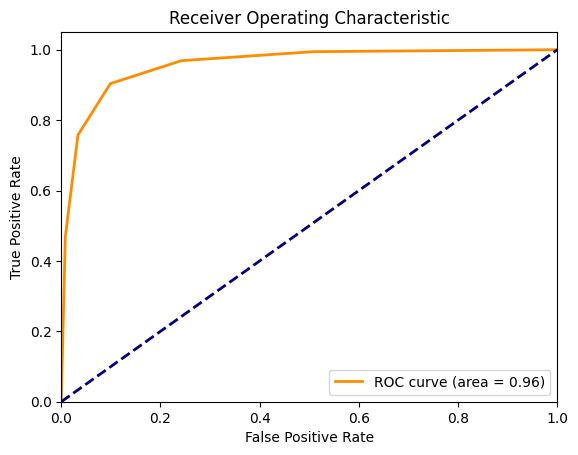

In [40]:
# Plotando a Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [41]:
# Especificidade
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
specificity = tn / (tn+fp)
print(f"Especificidade: {specificity:.4f}")

Especificidade: 0.9011


#**Questão 5:**

A eficiência do classificador KNN neste estudo foi avaliada em um contexto onde o dataset original, significativamente grande com 416.808 linhas, passou por  etapas de pré-processamento para a modelagem eficaz. Primeiramente, a base de dados foi reduzida para 20.000 linhas para facilitar o manuseio e a computação, sem comprometer a integridade da análise.

Além da redução do tamanho do dataset, foi feita uma limpeza e preparação dos dados, incluindo a remoção de stopwords dos textos. Este passo é crucial em tarefas de processamento de linguagem natural (PLN), pois remove palavras que são frequentes na língua mas pouco informativas para o modelo, permitindo que o foco seja nas palavras que efetivamente contribuem para o significado do texto e, por conseguinte, para a classificação dos sentimentos.

Uma nova coluna foi criada para armazenar os textos após a remoção de stopwords, fornecendo uma base otimizada para a codificação por TF-IDF. A transformação TF-IDF foi então aplicada para converter o texto processado em um conjunto de features numéricas, servindo como entrada para o modelo KNN. Isto é necessário para traduzir os dados textuais em um formato que os algoritmos de machine learning possam interpretar e aprender.

Adicionalmente, houve uma seleção dos rótulos da coluna 'label', limitando o escopo da análise aos sentimentos de tristeza (0) e alegria (1). Esta decisão simplificou a natureza do problema de classificação para um cenário binário e assegurou foco em emoções relevantes para a análise.

### Análise da Acurácia para Diferentes Valores de \(K\)

- **Aumento da Acurácia com \(K\)**: A acurácia aumenta consistentemente à medida que \(K\) aumenta de 1 a 15, iniciando em 0.8452 para \(K=1\) e alcançando 0.9343 para \(K=15\). Isso indica que o classificador se beneficia da consideração de mais vizinhos próximos, o que sugere que as decisões de classificação se tornam mais robustas à medida que mais vizinhos são considerados. Esse comportamento é típico em datasets onde as instâncias de uma mesma classe tendem a agrupar-se, mas um \(K\) muito alto pode levar a um aumento no risco de underfitting, apesar de não ser aparente neste intervalo específico.

- **Estabilidade do Modelo**: A acurácia média de 0.9335 com um desvio padrão de 0.0031 na validação cruzada indica que o modelo é estável em diferentes subsets do dataset, mostrando variação mínima na performance, o que é um bom sinal de generalização.

### Análise das Métricas de Desempenho

- **Equilíbrio entre Precisão e Recall**: A precisão de 0.9139 e o recall de 0.9037 são relativamente altos e balanceados, sugerindo que o classificador tem uma boa capacidade de identificar corretamente as instâncias positivas (precisão) enquanto captura uma grande proporção das instâncias positivas reais (recall). O F1-Score de 0.9088, sendo uma média harmônica entre precisão e recall, confirma esse equilíbrio, indicando uma eficiência geral sólida do classificador.

- **Especificidade**: A especificidade de 0.9011 é comparável ao recall, indicando que o modelo é quase igualmente bom em identificar verdadeiros negativos e verdadeiros positivos. Isso é particularmente importante em aplicações onde é crucial não só identificar corretamente os casos positivos mas também evitar falsos positivos.


O classificador KNN demonstrou ser eficiente neste dataset, com um aumento na acurácia à medida que o número de vizinhos \(K\) cresce, sem sinais de underfitting dentro do intervalo explorado. As métricas de precisão, recall, F1-score e especificidade indicam  equilíbrio na capacidade do classificador de prever as instâncias de ambas as classes, mantendo um baixo número tanto de falsos positivos quanto de falsos negativos.

A escolha do valor de \(K=15\) parece ser ótima neste caso, oferecendo maior acurácia entre os valores testados. No entanto, é importante considerar o custo computacional associado ao aumento de \(K\) e avaliar se o ganho marginal na acurácia justifica esse custo adicional em aplicações práticas.

Finalmente, o desempenho e o equilíbrio entre as métricas sugerem que o modelo KNN, configurado com os parâmetros testados, é uma escolha sólida para este problema de classificação binária, especialmente com \(K\) configurado para um valor mais alto dentro do intervalo testado.

Link para o Google Colab:
https://colab.research.google.com/drive/1exD00Yh7DztGRQ63HDzB2F672HQOVcn2?usp=sharing